In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [2]:
latent_dim = 128
EPOCH = 30
learning_rate = 0.002

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(32,32,3)),
            layers.Conv2D(8, kernel_size=2, padding='same'),
            layers.ReLU(),
            layers.MaxPool2D((2,2)),
            layers.Conv2D(16, kernel_size=2, padding='same'),
            layers.ReLU(),
            layers.MaxPool2D((2,2)),
            layers.Conv2D(32, kernel_size=2, padding='same'),
            layers.ReLU(),
            layers.MaxPool2D((2,2))
            ])
        self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(filters = 16, kernel_size=2, strides=2, activation='relu'),
        layers.Conv2DTranspose(filters = 8, kernel_size=2, strides=2, activation='relu'),
        layers.Conv2DTranspose(filters = 3, kernel_size=2, strides=2, activation='relu'),
        layers.Reshape((32, 32, 3))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         104       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        528       
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                    

In [6]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=losses.MeanSquaredError())

In [7]:
history = autoencoder.fit(x_train, x_train,
                epochs=EPOCH,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0234 - val_loss: 0.0132
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 8/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 9/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 10/30
1563/1563 [==============================] - 14s 9ms/step - l

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


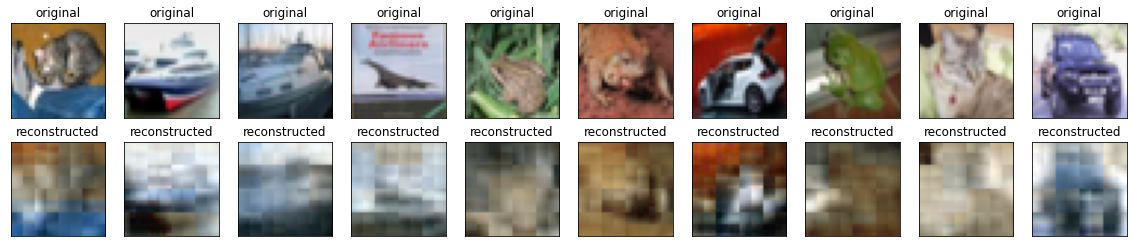

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
losses = history.history['loss']
test_losses = history.history['val_loss']

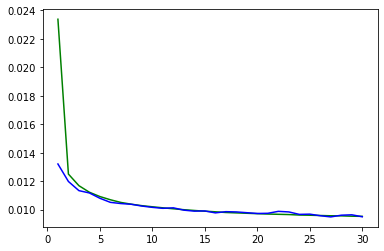

In [10]:
x = range(1, EPOCH+1)
plt.plot(x, losses, 'g', x, test_losses, 'b')
